<a href="https://colab.research.google.com/github/nishitmv/ML/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

df = pd.read_csv('/content/sample_data/Regression_train.csv', sep='\s+', header=None)

params = torch.tensor(df.iloc[:, 2:].values, dtype=torch.float32)
results = torch.tensor(df.iloc[:, :2].values, dtype=torch.float32)

params = scaler.fit_transform(params)
results = scaler.transform(results)

print(params)
print(results)


tensor([[3.5626, 1.1124, 4.2081,  ..., 2.8654, 4.7738, 3.5394],
        [2.3548, 1.0479, 2.2690,  ..., 4.6811, 3.2155, 3.9727],
        [3.0380, 4.7195, 1.5023,  ..., 1.3756, 4.3633, 2.9885],
        ...,
        [1.8304, 4.8674, 3.7249,  ..., 4.9459, 3.6562, 2.5198],
        [1.4653, 2.6096, 3.3155,  ..., 4.0666, 4.5233, 3.4353],
        [3.8281, 2.5862, 0.9265,  ..., 1.5923, 1.7858, 2.5275]])
tensor([[1.3263, 1.8621],
        [1.3415, 1.7866],
        [1.3303, 1.8262],
        ...,
        [1.3147, 1.8126],
        [1.2990, 1.9870],
        [1.3421, 1.8050]])


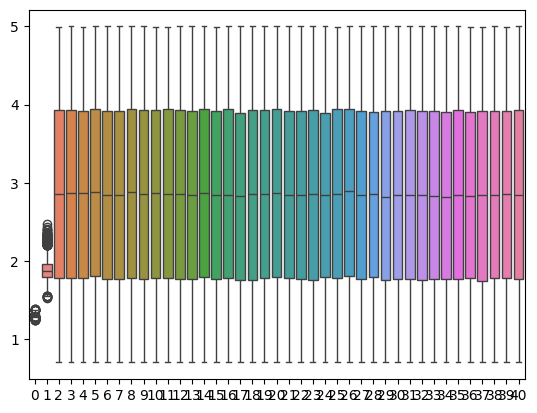

In [ ]:
from sklearn.model_selection import train_test_split

sns.boxplot(df)
plt.show()


In [ ]:

params_train, params_test, results_train, results_test = train_test_split(params, results, test_size=0.2, random_state=42)

print(params_train)
print(params_test)
print(results_train)
print(results_test)

tensor([[3.0506, 0.8165, 1.1200,  ..., 3.0824, 4.8815, 3.1599],
        [2.6807, 1.7307, 0.9202,  ..., 1.9203, 1.4501, 3.6719],
        [1.6943, 3.8034, 2.8626,  ..., 2.8942, 2.1219, 2.8083],
        ...,
        [3.5967, 1.8779, 4.9596,  ..., 1.9548, 2.7661, 4.8802],
        [4.2970, 4.0758, 4.5397,  ..., 0.9494, 1.9070, 1.9425],
        [1.4227, 2.3567, 1.4152,  ..., 3.7531, 1.5123, 1.3288]])
tensor([[0.7398, 1.9411, 4.8156,  ..., 4.9514, 2.7827, 3.2145],
        [2.6839, 0.7304, 1.6362,  ..., 3.3412, 4.1177, 4.3871],
        [4.1499, 3.3760, 4.0481,  ..., 1.1269, 0.9804, 4.3398],
        ...,
        [4.0061, 3.1030, 4.6329,  ..., 4.4383, 4.4369, 4.8930],
        [1.5496, 4.2484, 3.3109,  ..., 2.1621, 2.3953, 1.1067],
        [3.4783, 0.7876, 4.6745,  ..., 4.0686, 2.6936, 2.8667]])
tensor([[1.3245, 1.9800],
        [1.3089, 1.9878],
        [1.3497, 1.7434],
        ...,
        [1.3195, 1.9072],
        [1.3034, 2.0813],
        [1.3542, 1.7507]])
tensor([[1.3193, 1.9288],
        

 MSE

torch.Size([19200, 39])
Epoch 1/20, Train Loss: 2.2823, Test Loss: 1.8121
Epoch 2/20, Train Loss: 1.8199, Test Loss: 1.4003
Epoch 3/20, Train Loss: 1.4064, Test Loss: 1.0389
Epoch 4/20, Train Loss: 1.0436, Test Loss: 0.7303
Epoch 5/20, Train Loss: 0.7335, Test Loss: 0.4766
Epoch 6/20, Train Loss: 0.4786, Test Loss: 0.2803
Epoch 7/20, Train Loss: 0.2813, Test Loss: 0.1440
Epoch 8/20, Train Loss: 0.1440, Test Loss: 0.0696
Epoch 9/20, Train Loss: 0.0690, Test Loss: 0.0564
Epoch 10/20, Train Loss: 0.0553, Test Loss: 0.0940
Epoch 11/20, Train Loss: 0.0924, Test Loss: 0.1569
Epoch 12/20, Train Loss: 0.1548, Test Loss: 0.2128
Epoch 13/20, Train Loss: 0.2104, Test Loss: 0.2410
Epoch 14/20, Train Loss: 0.2385, Test Loss: 0.2380
Epoch 15/20, Train Loss: 0.2355, Test Loss: 0.2112
Epoch 16/20, Train Loss: 0.2089, Test Loss: 0.1721
Epoch 17/20, Train Loss: 0.1699, Test Loss: 0.1310
Epoch 18/20, Train Loss: 0.1289, Test Loss: 0.0952
Epoch 19/20, Train Loss: 0.0933, Test Loss: 0.0687
Epoch 20/20, Tra

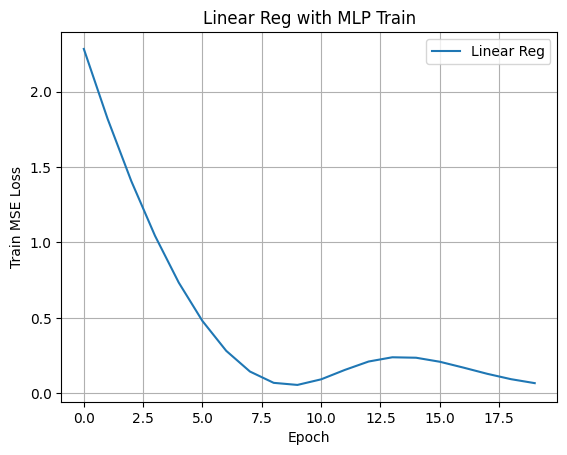

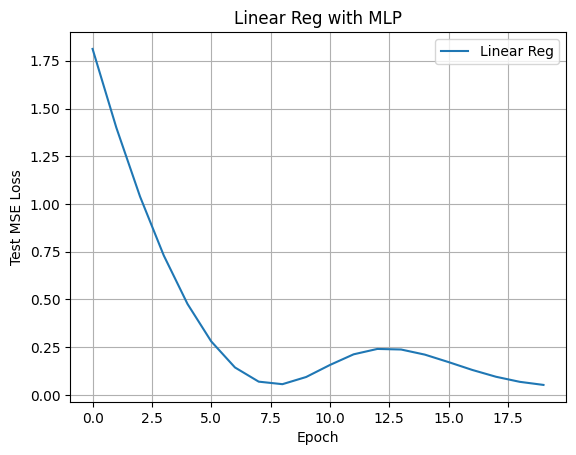

In [ ]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score

print(params_train.shape)

model = nn.Sequential(
            nn.Linear(params_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )


mseLoss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_mse_losses = []
test_r2_scores = []
results_pred = []
epochs = 20
for epoch in range(epochs):
 model.train()
 optimizer.zero_grad()
 outputs = model(params_train)
 loss = mseLoss(outputs, results_train)
 loss.backward()
 optimizer.step()

 model.eval()
 with torch.no_grad():
     test_pred = model(params_test)
     test_mse_loss = mseLoss(test_pred, results_test)
     results_pred.append(test_pred)

 train_losses.append(loss.item())
 test_mse_losses.append(test_mse_loss.item())

 print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_mse_loss.item():.4f}')


plt.plot(train_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Train MSE Loss")
plt.title("Linear Reg with MLP Train")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(test_mse_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Test MSE Loss")
plt.title("Linear Reg with MLP")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import r2_score


final_test_pred = results_pred[-1].cpu().detach().numpy()
results_test_cpu = results_test.cpu().detach().numpy()


test_r2_scores = r2_score(results_test_cpu, final_test_pred)
print(test_r2_scores)
# print(len(test_r2_scores)) # This line is not needed and will cause an error if test_r2_scores is a scalar
r2_each = r2_score(results_test_cpu, final_test_pred, multioutput='raw_values')
print("Average R2 across outputs:", test_r2_scores)
print("Individual R2 scores:", r2_each)

-27.226959228515625
Average R2 across outputs: -27.226959228515625
Individual R2 scores: [-49.36493   -5.088988]


MSE and MAE

torch.Size([19200, 39])
Epoch 1/30, Train Loss: 2.6393, Test MSE Loss: 2.4584
Epoch 1/30, Train Loss: 2.6393, Test MAE Loss: 1.5549
Epoch 2/30, Train Loss: 2.4580, Test MSE Loss: 2.2952
Epoch 2/30, Train Loss: 2.4580, Test MAE Loss: 1.5020
Epoch 3/30, Train Loss: 2.2949, Test MSE Loss: 2.1459
Epoch 3/30, Train Loss: 2.2949, Test MAE Loss: 1.4521
Epoch 4/30, Train Loss: 2.1461, Test MSE Loss: 2.0030
Epoch 4/30, Train Loss: 2.1461, Test MAE Loss: 1.4029
Epoch 5/30, Train Loss: 2.0035, Test MSE Loss: 1.8557
Epoch 5/30, Train Loss: 2.0035, Test MAE Loss: 1.3501
Epoch 6/30, Train Loss: 1.8565, Test MSE Loss: 1.6981
Epoch 6/30, Train Loss: 1.8565, Test MAE Loss: 1.2910
Epoch 7/30, Train Loss: 1.6993, Test MSE Loss: 1.5284
Epoch 7/30, Train Loss: 1.6993, Test MAE Loss: 1.2237
Epoch 8/30, Train Loss: 1.5299, Test MSE Loss: 1.3468
Epoch 8/30, Train Loss: 1.5299, Test MAE Loss: 1.1470
Epoch 9/30, Train Loss: 1.3484, Test MSE Loss: 1.1552
Epoch 9/30, Train Loss: 1.3484, Test MAE Loss: 1.0597
Epoc

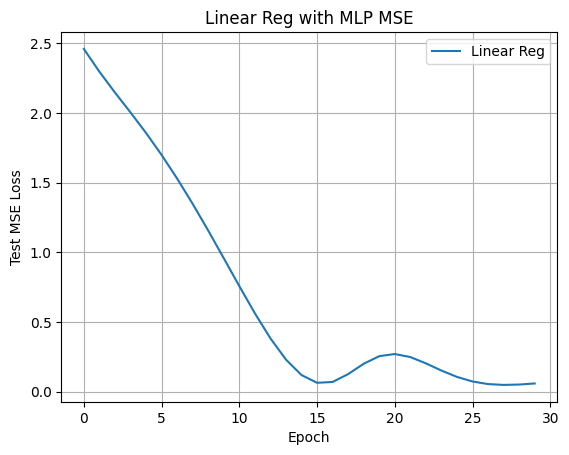

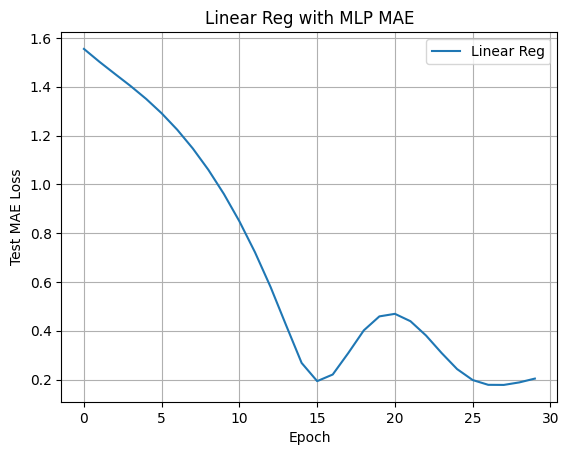

In [ ]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score

print(params_train.shape)

model = nn.Sequential(
            nn.Linear(params_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 64),
             nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )


mseLoss = nn.MSELoss()
maeLoss = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_mse_losses = []
test_mae_losses = []
test_r2_scores = []
results_pred = []
epochs = 30
for epoch in range(epochs):
 model.train()
 optimizer.zero_grad()
 outputs = model(params_train)
 loss = mseLoss(outputs, results_train)
 loss.backward()
 optimizer.step()

 model.eval()
 with torch.no_grad():
     test_pred = model(params_test)
     test_mse_loss = mseLoss(test_pred, results_test)
     test_mae_loss = maeLoss(test_pred, results_test)
     results_pred.append(test_pred)

 train_losses.append(loss.item())
 test_mse_losses.append(test_mse_loss.item())
 test_mae_losses.append(test_mae_loss.item())
 print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test MSE Loss: {test_mse_loss.item():.4f}')
 print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test MAE Loss: {test_mae_loss.item():.4f}')




plt.plot(test_mse_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Test MSE Loss")
plt.title("Linear Reg with MLP MSE")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(test_mae_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Test MAE Loss")
plt.title("Linear Reg with MLP MAE")
plt.legend()
plt.grid(True)
plt.show()

More Layers

torch.Size([19200, 39])
Epoch 1/30, Train Loss: 2.6849, Test Loss: 2.5234
Epoch 2/30, Train Loss: 2.5244, Test Loss: 2.4111
Epoch 3/30, Train Loss: 2.4117, Test Loss: 2.3109
Epoch 4/30, Train Loss: 2.3115, Test Loss: 2.2118
Epoch 5/30, Train Loss: 2.2122, Test Loss: 2.1070
Epoch 6/30, Train Loss: 2.1072, Test Loss: 1.9946
Epoch 7/30, Train Loss: 1.9946, Test Loss: 1.8748
Epoch 8/30, Train Loss: 1.8747, Test Loss: 1.7478
Epoch 9/30, Train Loss: 1.7475, Test Loss: 1.6133
Epoch 10/30, Train Loss: 1.6128, Test Loss: 1.4709
Epoch 11/30, Train Loss: 1.4703, Test Loss: 1.3209
Epoch 12/30, Train Loss: 1.3201, Test Loss: 1.1638
Epoch 13/30, Train Loss: 1.1630, Test Loss: 1.0013
Epoch 14/30, Train Loss: 1.0004, Test Loss: 0.8359
Epoch 15/30, Train Loss: 0.8348, Test Loss: 0.6716
Epoch 16/30, Train Loss: 0.6705, Test Loss: 0.5144
Epoch 17/30, Train Loss: 0.5133, Test Loss: 0.3724
Epoch 18/30, Train Loss: 0.3714, Test Loss: 0.2559
Epoch 19/30, Train Loss: 0.2550, Test Loss: 0.1764
Epoch 20/30, Tra

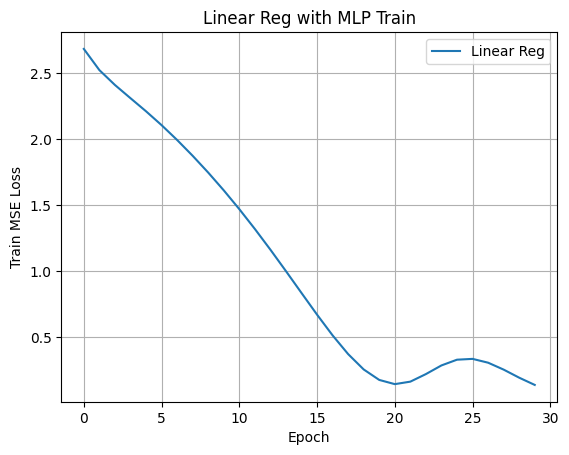

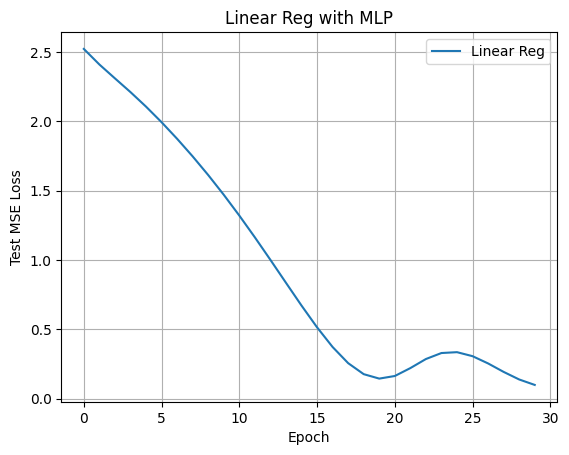

In [ ]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score

print(params_train.shape)

model = nn.Sequential(
            nn.Linear(params_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 64),
             nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
        )


mseLoss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_mse_losses = []
test_r2_scores = []
results_pred = []
epochs = 30
for epoch in range(epochs):
 model.train()
 optimizer.zero_grad()
 outputs = model(params_train)
 loss = mseLoss(outputs, results_train)
 loss.backward()
 optimizer.step()

 model.eval()
 with torch.no_grad():
     test_pred = model(params_test)
     test_mse_loss = mseLoss(test_pred, results_test)
     results_pred.append(test_pred)

 train_losses.append(loss.item())
 test_mse_losses.append(test_mse_loss.item())

 print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_mse_loss.item():.4f}')


plt.plot(train_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Train MSE Loss")
plt.title("Linear Reg with MLP Train")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(test_mse_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Test MSE Loss")
plt.title("Linear Reg with MLP")
plt.legend()
plt.grid(True)
plt.show()

TanH + Adam

torch.Size([19200, 39])
Epoch 1/30, Train Loss: 2.4231, Test Loss: 2.0451
Epoch 2/30, Train Loss: 2.0502, Test Loss: 1.7139
Epoch 3/30, Train Loss: 1.7181, Test Loss: 1.4222
Epoch 4/30, Train Loss: 1.4256, Test Loss: 1.1686
Epoch 5/30, Train Loss: 1.1713, Test Loss: 0.9500
Epoch 6/30, Train Loss: 0.9520, Test Loss: 0.7626
Epoch 7/30, Train Loss: 0.7641, Test Loss: 0.6027
Epoch 8/30, Train Loss: 0.6039, Test Loss: 0.4674
Epoch 9/30, Train Loss: 0.4683, Test Loss: 0.3542
Epoch 10/30, Train Loss: 0.3548, Test Loss: 0.2609
Epoch 11/30, Train Loss: 0.2613, Test Loss: 0.1857
Epoch 12/30, Train Loss: 0.1860, Test Loss: 0.1268
Epoch 13/30, Train Loss: 0.1269, Test Loss: 0.0822
Epoch 14/30, Train Loss: 0.0822, Test Loss: 0.0502
Epoch 15/30, Train Loss: 0.0501, Test Loss: 0.0288
Epoch 16/30, Train Loss: 0.0287, Test Loss: 0.0163
Epoch 17/30, Train Loss: 0.0162, Test Loss: 0.0109
Epoch 18/30, Train Loss: 0.0107, Test Loss: 0.0109
Epoch 19/30, Train Loss: 0.0107, Test Loss: 0.0147
Epoch 20/30, Tra

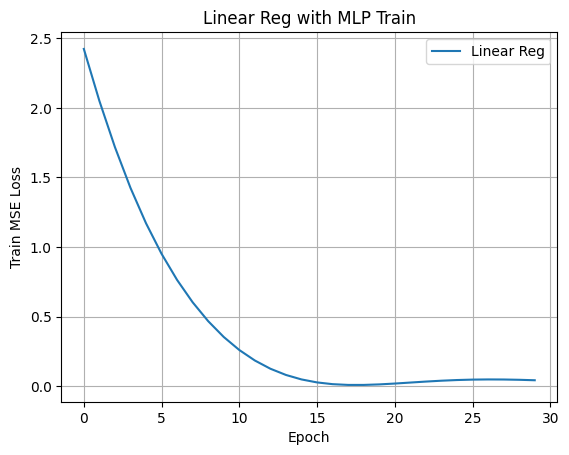

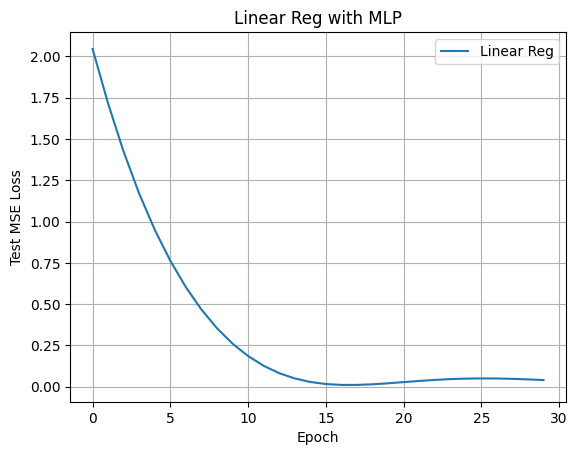

In [ ]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score

print(params_train.shape)

model = nn.Sequential(
            nn.Linear(params_train.shape[1], 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, 2)
        )


mseLoss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_mse_losses = []
test_r2_scores = []
results_pred = []
epochs = 30
for epoch in range(epochs):
 model.train()
 optimizer.zero_grad()
 outputs = model(params_train)
 loss = mseLoss(outputs, results_train)
 loss.backward()
 optimizer.step()

 model.eval()
 with torch.no_grad():
     test_pred = model(params_test)
     test_mse_loss = mseLoss(test_pred, results_test)
     results_pred.append(test_pred)

 train_losses.append(loss.item())
 test_mse_losses.append(test_mse_loss.item())

 print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_mse_loss.item():.4f}')


plt.plot(train_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Train MSE Loss")
plt.title("Linear Reg with MLP Train")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(test_mse_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Test MSE Loss")
plt.title("Linear Reg with MLP")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
ADAM + Sigmoid

torch.Size([19200, 39])
Epoch 1/50, Train Loss: 2.3982, Test Loss: 2.2884
Epoch 2/50, Train Loss: 2.2888, Test Loss: 2.1815
Epoch 3/50, Train Loss: 2.1820, Test Loss: 2.0772
Epoch 4/50, Train Loss: 2.0776, Test Loss: 1.9755
Epoch 5/50, Train Loss: 1.9759, Test Loss: 1.8765
Epoch 6/50, Train Loss: 1.8769, Test Loss: 1.7801
Epoch 7/50, Train Loss: 1.7805, Test Loss: 1.6863
Epoch 8/50, Train Loss: 1.6867, Test Loss: 1.5951
Epoch 9/50, Train Loss: 1.5954, Test Loss: 1.5065
Epoch 10/50, Train Loss: 1.5068, Test Loss: 1.4204
Epoch 11/50, Train Loss: 1.4207, Test Loss: 1.3370
Epoch 12/50, Train Loss: 1.3373, Test Loss: 1.2561
Epoch 13/50, Train Loss: 1.2564, Test Loss: 1.1778
Epoch 14/50, Train Loss: 1.1781, Test Loss: 1.1021
Epoch 15/50, Train Loss: 1.1024, Test Loss: 1.0291
Epoch 16/50, Train Loss: 1.0293, Test Loss: 0.9588
Epoch 17/50, Train Loss: 0.9590, Test Loss: 0.8911
Epoch 18/50, Train Loss: 0.8913, Test Loss: 0.8262
Epoch 19/50, Train Loss: 0.8264, Test Loss: 0.7640
Epoch 20/50, Tra

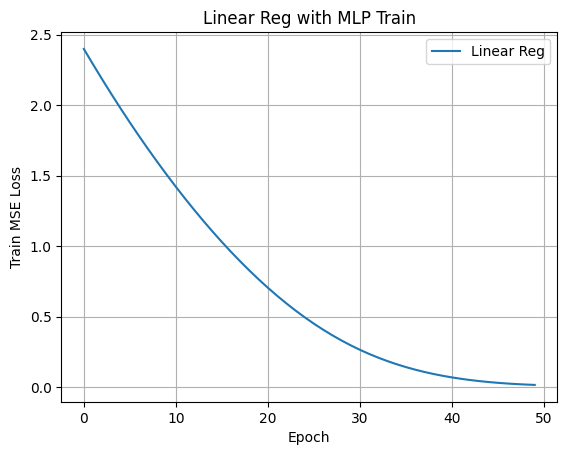

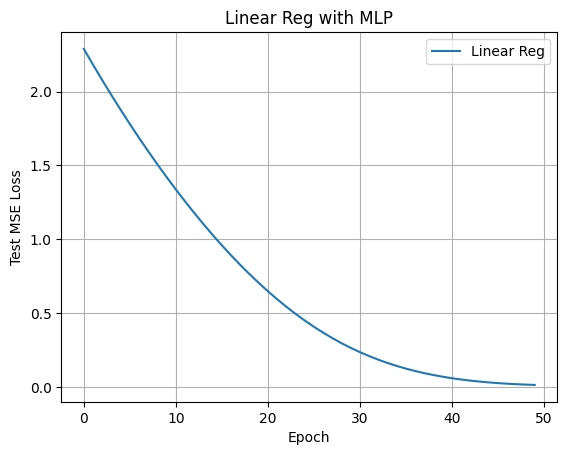

In [ ]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score

print(params_train.shape)

model = nn.Sequential(
            nn.Linear(params_train.shape[1], 64),
            nn.Sigmoid(),
            nn.Linear(64, 64),
            nn.Sigmoid(),
            nn.Linear(64, 32),
            nn.Sigmoid(),
            nn.Linear(32, 2)
        )


mseLoss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_mse_losses = []
test_r2_scores = []
results_pred = []
epochs = 50
for epoch in range(epochs):
 model.train()
 optimizer.zero_grad()
 outputs = model(params_train)
 loss = mseLoss(outputs, results_train)
 loss.backward()
 optimizer.step()

 model.eval()
 with torch.no_grad():
     test_pred = model(params_test)
     test_mse_loss = mseLoss(test_pred, results_test)
     results_pred.append(test_pred)

 train_losses.append(loss.item())
 test_mse_losses.append(test_mse_loss.item())

 print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_mse_loss.item():.4f}')


plt.plot(train_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Train MSE Loss")
plt.title("Linear Reg with MLP Train")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(test_mse_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Test MSE Loss")
plt.title("Linear Reg with MLP")
plt.legend()
plt.grid(True)
plt.show()

SGD + Sigmoid

torch.Size([19200, 39])
Epoch 1/50, Train Loss: 2.4839, Test Loss: 2.0353
Epoch 2/50, Train Loss: 2.0358, Test Loss: 1.6678
Epoch 3/50, Train Loss: 1.6682, Test Loss: 1.3661
Epoch 4/50, Train Loss: 1.3664, Test Loss: 1.1183
Epoch 5/50, Train Loss: 1.1186, Test Loss: 0.9148
Epoch 6/50, Train Loss: 0.9151, Test Loss: 0.7478
Epoch 7/50, Train Loss: 0.7480, Test Loss: 0.6109
Epoch 8/50, Train Loss: 0.6111, Test Loss: 0.4988
Epoch 9/50, Train Loss: 0.4990, Test Loss: 0.4071
Epoch 10/50, Train Loss: 0.4072, Test Loss: 0.3321
Epoch 11/50, Train Loss: 0.3322, Test Loss: 0.2710
Epoch 12/50, Train Loss: 0.2711, Test Loss: 0.2211
Epoch 13/50, Train Loss: 0.2212, Test Loss: 0.1806
Epoch 14/50, Train Loss: 0.1806, Test Loss: 0.1476
Epoch 15/50, Train Loss: 0.1476, Test Loss: 0.1208
Epoch 16/50, Train Loss: 0.1208, Test Loss: 0.0990
Epoch 17/50, Train Loss: 0.0990, Test Loss: 0.0814
Epoch 18/50, Train Loss: 0.0814, Test Loss: 0.0671
Epoch 19/50, Train Loss: 0.0671, Test Loss: 0.0556
Epoch 20/50, Tra

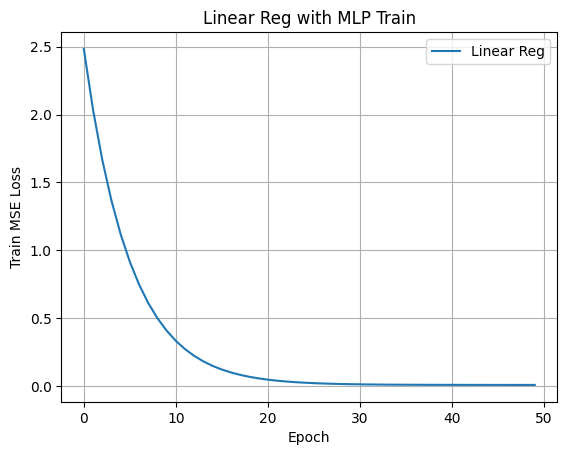

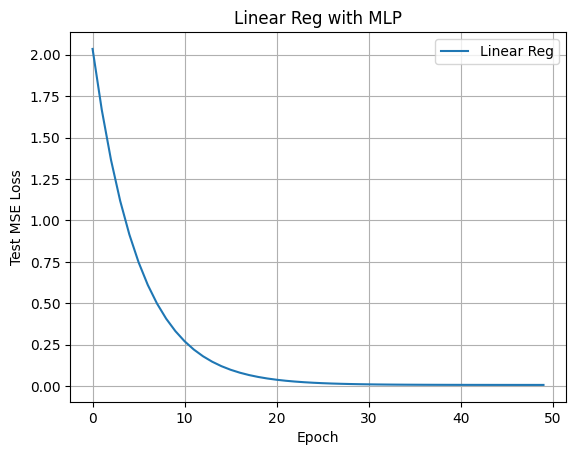

In [ ]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score

print(params_train.shape)

model = nn.Sequential(
            nn.Linear(params_train.shape[1], 64),
            nn.Sigmoid(),
            nn.Linear(64, 64),
            nn.Sigmoid(),
            nn.Linear(64, 32),
            nn.Sigmoid(),
            nn.Linear(32, 2)
        )


mseLoss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

train_losses = []
test_mse_losses = []
test_r2_scores = []
results_pred = []
epochs = 50
for epoch in range(epochs):
 model.train()
 optimizer.zero_grad()
 outputs = model(params_train)
 loss = mseLoss(outputs, results_train)
 loss.backward()
 optimizer.step()

 model.eval()
 with torch.no_grad():
     test_pred = model(params_test)
     test_mse_loss = mseLoss(test_pred, results_test)
     results_pred.append(test_pred)

 train_losses.append(loss.item())
 test_mse_losses.append(test_mse_loss.item())

 print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_mse_loss.item():.4f}')


plt.plot(train_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Train MSE Loss")
plt.title("Linear Reg with MLP Train")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(test_mse_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Test MSE Loss")
plt.title("Linear Reg with MLP")
plt.legend()
plt.grid(True)
plt.show()